1 a)

$$ \nabla^2 J(\theta)_{ij}=-\frac{1}{m}\sum_{k=1}^m\partial^2(y^{(k)}\log(h_\theta(x^{(k)}))+(1-y^{(k)})\log(1-h_\theta(x^{(k)})))/\partial \theta_i\partial\theta_j$$

$$=-\frac{1}{m}\sum_{k=1}^m(y^{(k)}\partial^2(\log(h_\theta(x^{(k)})))/\partial\theta_i\partial\theta_j+(1-y^{(k)})\partial^2(\log(1-h_\theta(x^{(k)})))/\partial\theta_i\partial\theta_j).$$

$$\partial^2(\log(h_\theta(x^{(k)})))/\partial\theta_i\partial\theta_j=\partial^2(\log(g(\theta^Tx^{(k)}))/\partial\theta_i\partial\theta_j$$

$$=\partial(x^{(k)}_i(1-g(\theta x^{(k)}))/\partial\theta_j=\partial(-x_i^{(k)}g(\theta\cdot x))/\partial\theta_j=-x_i^{(k)}x_j^{(k)}g(\theta x^{(k)})(1-g(\theta x^{(k)}))$$

$$\partial^2(\log(1-h_\theta(x^{(k)})))/\partial\theta_i\partial\theta_j=\partial^2(\log(1-g(\theta x^{(k)})))/\partial\theta_i\partial\theta_j$$

$$=\partial((1-g(\theta x^{(k)}))^{-1}(-g'(\theta x^{(k)}))x^{(k)}_i)/\partial\theta_j=\partial((1-g(\theta x^{(k)}))^{-1}(-g(\theta x^{(k)})(1-g(\theta x^{(k)})))x^{(k)}_i)/\partial\theta_j$$

$$=\partial(-g(\theta x^{(k)})x_i^{(k)})/\partial\theta_j=-x_i^{(k)}x_j^{(k)}g(\theta x^{(k)})(1-g(\theta x^{(k)}))$$


So, $$\nabla^2 J(\theta)_{ij}=\frac{1}{m}\sum_{k=1}^{(m)}x_i^{(k)}x_j^{(k)}g(\theta x^{(k)})(1-g(\theta x^{(k)})).$$

So, $$z^THz=\sum_{i=1}^{n}\sum_{j=1}^nz_iz_j H_{ij}=\sum_{i=1}^n\sum_{j=1}^n z_iz_j\frac{1}{m}\sum_{k=1}^{m}x_i^{(k)}x_j^{(k)}e^{-\theta x^{(k)}}/(1+e^{-\theta x^{(k)}})^2$$

$$=\frac{1}{m}\sum_{k=1}^mg(\theta x^{(k)})(1-g(\theta x^{(k)}))\sum_{i=1}^n\sum_{j=1}^nz_iz_jx_i^{(k)}x_j^{(k)}\geq 0$$

since $$\sum_{i=1}^n\sum_{j=1}^n z_iz_jx_i^{(k)}x_j^{(k)}=z^T x x^T z=(x^Tz)^2$$

and $g(z)\in(0,1)$.

$$\nabla J(\theta)_i=d(-\frac{1}{m}\sum_{j=1}^m y^{(j)}\log(g(\theta x^{(j)}))+(1-y^{(j)})\log(1-g(\theta x^{(j)})))/d\theta_i$$

$$=-\frac{1}{m}\sum_{j=1}^m y^{(j)}g^{-1}(\theta x^{(j)})g(\theta x^{(j)})(1-g(\theta x^{(j)}))x^{(j)}_i+(1-y^{(j)})(1-g(\theta x^{(j)}))^{-1}(-g(\theta x^{(j)})(1-g(\theta x^{(j)})))x_i^{(j)}$$

$$=-\frac{1}{m}\sum_{j=1}^m y^{(j)}(1-g(\theta x^{(j)}))x_i^{(j)}-(1-y^{(j)})g(\theta x^{(j)})x_i^{(j)}$$

$$=-\frac{1}{m}\sum_{j=1}^m y^{(j)}x_i^{(j)}-y^{(j)}g(\theta x^{(j)})x_i^{(j)}-(1-y^{(j)})g(\theta x^{(j)})x_i^{(j)}$$

$$=-\frac{1}{m}\sum_{j=1}^m y^{(j)}x_i^{(j)}-g(\theta x^{(j)})x_i^{(j)}=-\frac{1}{m}\sum_{j=1}^m (y^{(j)}-g(\theta x^{(j)}))x_i^{(j)}$$

1 b)

In [ ]:
import numpy as np
import os
os.chdir('/content/drive/MyDrive/cs229/problem-sets/PS1/src/')
import util

from linear_model import LinearModel


def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept = True)
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_eval)
    np.savetxt(pred_path, y_pred, delimiter=',', fmt='%d')  # Save as integer format if your predictions are class labels
    # *** END CODE HERE ***


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        self.theta = np.zeros(n)
        gradient = np.zeros(n)
        hessian = np.zeros((n, n))
        update = np.ones(n)
        while np.linalg.norm(update, 1) > 1e-5:
          for i in range(m):
            gradient += x[i] * (y[i] - 1 / (1 + np.exp(-np.dot(x[i], self.theta))))
            hessian += np.outer(x[i], x[i]) * 1/(1 + np.exp(-np.dot(x[i], self.theta))) * (np.exp(-np.dot(x[i], self.theta)/(1 + np.exp(-np.dot(x[i], self.theta)))))
          gradient = - gradient / m
          hessian = hessian / m
          inverse_hessian = np.linalg.inv(hessian)
          update = np.dot(inverse_hessian, gradient)
          self.theta = self.theta - update
        print(self.theta)
        return self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return np.dot(x, self.theta) >= 0
        # *** END CODE HERE ***

#if __name__ == "__main__":
#  train_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_train.csv'
#  eval_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_valid.csv'
#  pred_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_pred.csv'
#  main(train_path, eval_path, pred_path)

1 c)

$$p(y=1|x;\phi,\mu_0,\mu_1,\Sigma)=p(y=1,x;\phi,\mu_0,\mu_1,\Sigma)/p(x;\phi,\mu_0,\mu_1,\Sigma)$$

$$=p(y=1,x)/(p(y=0,x)+p(y=1,x))=p(x|y=0)p(y=0)/(p(x|y=0)p(y=0)+p(x|y=1)p(y=1))$$

$$=(1-\phi)\exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))/((1-\phi)\exp(-\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0))+\phi \exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)))$$

$$=1/(1+\frac{\phi}{1-\phi}\exp(-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)+\frac{1}{2}(x-\mu_0)^T\Sigma^{-1}(x-\mu_0)))$$

$$=1/(1+\frac{\phi}{1-\phi}\exp(-\frac{1}{2}(-\mu_1\Sigma^{-1}x-x\Sigma^{-1}\mu_1+\mu_1\Sigma^{-1}\mu_1+\mu_0\Sigma^{-1}x+x\Sigma^{-1}\mu_0-\mu_0\Sigma^{-1}\mu_0))$$

$$=1/(1+exp((\mu_1^T\Sigma^{-1}-\mu_0^T\Sigma^{-1})x+(-\frac{1}{2})(\mu_1\Sigma^{-1}\mu_1-\mu_0\Sigma^{-1}\mu_0)+\log(\frac{\phi}{1-\phi}))).$$



1 d)

$$ \ell(\phi, \mu_0, \mu_1, \Sigma) = \sum_{i=1}^m (\log p(x^{(i)}|y^{(i)};\mu_0,\mu_1,\Sigma)+\log p(y^{(i)};\phi))$$

$$=\sum_{i=1}^m (\log(\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}(\exp(-\frac{1}{2}(x^{(i)}-\mu_0)^T\Sigma^{-1}(x^{(i)}-\mu_0))(1-y^{(i)})\\-\frac{1}{2}(x-\mu_1)^T\Sigma^{-1}(x-\mu_1)y^{(i)})))+\log(\phi y^{(i)}+(1-\phi)(1-y^{(i)})))$$.

$$\nabla_\phi(\ell(\phi, \mu_0, \mu_1, \Sigma)) = \sum_{i=1}^m \frac{1}{\phi y^{(i)}+(1-\phi)(1-y^{(i)})}(2y^{(i)}-1)$$

$$=\sum_{i=1}^m(1(y^{(i)}=1)+1(y^{(i)}=0))\frac{1}{\phi y^{(i)}+(1-\phi)(1-y^{(i)})}(2y^{(i)}-1)=\sum_{i=1}^m 1(y^{(i)}=1)\frac{1}{\phi}-\sum_{i=1}^m 1(y^{(i)}=0)\frac{1}{1-\phi}$$

Suppose there are $q$ of the $y^{(i)}$s that are $1$, then $\nabla_\phi(\ell)=0$ implies $\frac{q}{\phi}=\frac{m-q}{1-\phi}$ and $q(1-\phi)=\phi(m-q)$. So, $q=\phi m$. So, $\phi=\frac{q}{m}$.

$$\nabla_{\mu_0}(\ell)=d(\sum_{i=1}^m-\frac{1}{2}(x^{(i)}-\mu_0)\Sigma^{-1}(x^{(i)}-\mu_0)(1-y^{(i)}))/d\mu_0$$

$$=\sum_{i=1}^m-\frac{1}{2}(2(x^{(i)}-\mu_0)\Sigma^{-1})(-1)(1-y^{(i)})=\sum_{i=1}^m(x^{(i)}-\mu_0)\Sigma^{-1}(1-y^{(i)})$$.

So, $\nabla_{\mu_0}(\ell)=0$ implies $\mu_0=\frac{\sum_{i=1}^m 1(y^{(i)}=0)x^{(i)}}{\sum_{i=1}^m 1(y^{(i)}=0)}$.

$$\nabla_{\mu_1}(\ell)=d(\sum_{i=1}^m(-\frac{1}{2}(x^{(i)}-\mu_1)\Sigma^{-1}(x^{(i)}-\mu_1)y^{(i)}))/d\mu_1$$

So, $\nabla_{\mu_1}(\ell)=0$ implies $\mu_1=\frac{\sum_{i=1}^m 1(y^{(i)}=1)x^{(i)}}{\sum_{i=1}^m 1(y^{(i)}=1)}$.

If $n=1$, then $$d\ell/d\Sigma=d(\sum_{i=1}^m\log(\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}})-\frac{1}{2}(x^{(i)}-\mu_0)\Sigma^{-1}(x^{(i)}-\mu_0)(1-y^{(i)})-\frac{1}{2}(x^{(i)}-\mu_1)\Sigma^{-1}(x^{(i)}-\mu_1)y^{(i)})/d\Sigma$$

$$=(d\sum_{i=1}^m(-\frac{1}{2}\log(\Sigma)-\frac{1}{2}(x^{(i)}-\mu_0)\Sigma^{-1}(x^{(i)}-\mu_0)(1-y^{(i)})-\frac{1}{2}(x^{(i)}-\mu_1)\Sigma^{-1}(x^{(i)}-\mu_1)y^{(i)}))/d\Sigma$$

$$=(d\sum_{i=1}^m -\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}}))/d\Sigma-\frac{m}{2}d\log\Sigma/d\Sigma$$

So, $d\ell/d\Sigma=0$ implies $\sum_{i=1}^m\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^2\Sigma^{-2}=\frac{m}{2}\Sigma^{-1}$ and $\Sigma=\frac{1}{m}\sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}})^2.$

1 e)

In [ ]:
import numpy as np
import os
os.chdir('/content/drive/MyDrive/cs229/problem-sets/PS1/src/')
import util

from linear_model import LinearModel


def main(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # *** START CODE HERE ***
    clf = GDA()
    clf.fit(x_train, y_train)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=False)
    y_pred = clf.predict(x_eval)
    np.savetxt(pred_path, y_pred, delimiter=',', fmt='%d')  # Save as integer format if your predictions are class labels
    # *** END CODE HERE ***


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        # *** START CODE HERE ***
        m, n = x.shape
        phi = np.dot(y, np.ones(m)) / m
        y = y.reshape(-1, 1)
        mu_0 = np.dot((1 - y).T, x) / np.dot((1 - y).T, np.ones(m).reshape(-1, 1))
        mu_1 = np.dot(y.T, x) / np.dot(y.T, np.ones(m).reshape(-1, 1))
        sigma = np.zeros((n, n))
        for i in range(m):
          normalized_x = x[i] - mu_0 * (1 - y[i]) - mu_1 * y[i]
          sigma += np.outer(normalized_x, normalized_x)
        sigma = sigma / m
        mu_0 = mu_0.reshape(-1, 1)
        mu_1 = mu_1.reshape(-1, 1)
        self.theta = np.dot(mu_1.T - mu_0.T, np.linalg.inv(sigma))
        theta_0 = - (np.dot(np.dot(mu_1.T, np.linalg.inv(sigma)), mu_1) - np.dot(np.dot(mu_0.T, np.linalg.inv(sigma)), mu_0)) / 2 + np.log(phi / (1 - phi))
        self.theta = np.insert(self.theta, 0, theta_0)
        print(self.theta)
        return self.theta
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        return np.dot(x, self.theta[:n]) + np.ones(m) * self.theta[n] >= 0
        # *** END CODE HERE


#if __name__ == "__main__":
#  train_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_train.csv'
#  eval_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_valid.csv'
#  pred_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_pred_gda.csv'
#  main(train_path, eval_path, pred_path)

1 f)

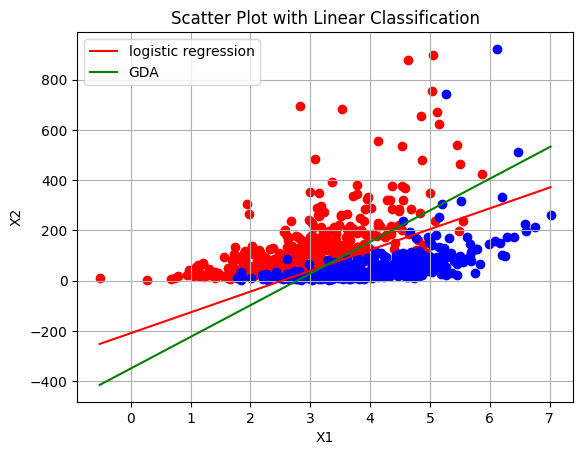

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('/content/drive/MyDrive/cs229/problem-sets/PS1/src/')
import util

# Load the training data.
train_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds1_train.csv'
x_train, y_train = util.load_dataset(train_path, add_intercept=False)
# Calculate m, c, n, and d for y = m * x + c and y = n * x + d
theta_1 = [-6.26018831, 2.47707306, -0.02991248]
theta_2 = [-6.17158405, 2.22055506, -0.01763375]
d = - theta_1[0] / theta_1[2]
n = - theta_1[1] / theta_1[2]
c = - theta_2[0] / theta_2[2]
m = - theta_2[1] / theta_2[2]

# Plotting the points
for i in range(len(x_train)):
    if y_train[i] == 0:
        plt.scatter(x_train[i, 0], x_train[i, 1], color='red')  # Points where Y is 0
    else:
        plt.scatter(x_train[i, 0], x_train[i, 1], color='blue')  # Points where Y is 1

# Generating and plotting line 1
x_values = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 100)
y_values = n * x_values + d
plt.plot(x_values, y_values, '-r', label='logistic regression')

# Generating and plotting line 2
x_values = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 100)
y_values = m * x_values + c
plt.plot(x_values, y_values, '-g', label='GDA')

# Adding details and showing the plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Linear Classification')
plt.legend()
plt.grid(True)
plt.show()

1 g)

[ 2.38425097  3.63712092 -3.81234265]
[ 2.50874989  3.76951271 -3.94657107]


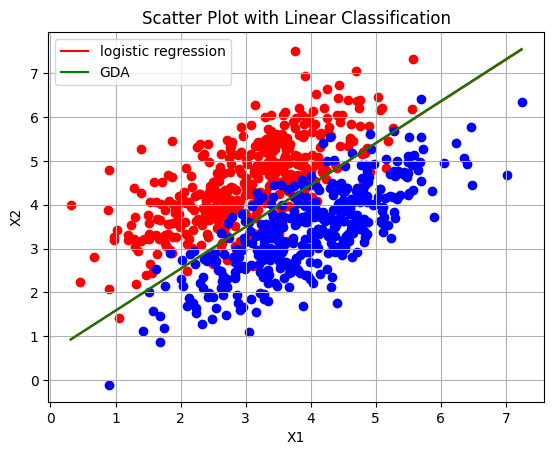

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('/content/drive/MyDrive/cs229/problem-sets/PS1/src/')
import util


# Load datapoints
train_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds2_train.csv'
eval_path = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds2_valid.csv'
pred_path_log = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds2_pred_log.csv'
pred_path_gda = '/content/drive/MyDrive/cs229/problem-sets/PS1/data/ds2_pred_gda.csv'
x_train_log, y_train_log = util.load_dataset(train_path, add_intercept=True)
x_eval_log, y_eval_log = util.load_dataset(eval_path, add_intercept=True)
x_train_gda, y_train_gda = util.load_dataset(train_path, add_intercept=False)
x_eval_gda, y_eval_gda = util.load_dataset(eval_path, add_intercept=False)

# train model
lr = LogisticRegression()
theta_log = lr.fit(x_train_log, y_train_log)
gda = GDA()
theta_gda = gda.fit(x_train_gda, y_train_gda)

# Calculate m, c, n, and d for y = m * x + c and y = n * x + d
d = - theta_log[0] / theta_log[2]
n = - theta_log[1] / theta_log[2]
c = - theta_gda[0] / theta_gda[2]
m = - theta_gda[1] / theta_gda[2]

# Plot the points
for i in range(len(x_train_gda)):
    if y_train_gda[i] == 0:
        plt.scatter(x_train_gda[i, 0], x_train_gda[i, 1], color='red')  # Points where Y is 0
    else:
        plt.scatter(x_train_gda[i, 0], x_train_gda[i, 1], color='blue')  # Points where Y is 1

# Generate and plot line 1
x_values = np.linspace(x_train_gda[:, 0].min(), x_train_gda[:, 0].max(), 100)
y_values = n * x_values + d
plt.plot(x_values, y_values, '-r', label='logistic regression')

# Generate and plot line 2
x_values = np.linspace(x_train_gda[:, 0].min(), x_train_gda[:, 0].max(), 100)
y_values = m * x_values + c
plt.plot(x_values, y_values, '-g', label='GDA')

# Add details and show the plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot with Linear Classification')
plt.legend()
plt.grid(True)
plt.show()